In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
data = pd.read_csv('Population_Survey_Data_lyst.csv')
data.head()

,ID,Age,Gender,Income,Education,Region
0,1,62,Other,96138,Masters,East
1,2,65,Other,76543,PhD,East
2,3,71,Male,138887,Bachelors,East
3,4,18,Other,121643,Bachelors,South
4,5,21,Male,143192,Masters,East


In [44]:
data.shape

(1000, 6)

# 1. Simple random sampling: 100 people randomly

In [45]:
sample_data = data.sample(n=100, random_state=42)
sample_data.head()

,ID,Age,Gender,Income,Education,Region
521,522,74,Male,43185,Bachelors,East
737,738,25,Female,73725,High School,West
740,741,63,Other,110045,Bachelors,South
660,661,25,Male,107801,Bachelors,North
411,412,40,Male,63466,PhD,South


In [46]:
sample_data.to_csv('random_sampling.csv')

# 2. stratified Random sampling

In [47]:
stratified_sample_data = data.groupby('Region').apply(lambda x: x.sample(min(len(x),25), random_state=42))
stratified_sample_data.to_csv('stratified_random_sampling.csv')

C:\Users\ajitk\AppData\Local\Temp\ipykernel_5872\2982269467.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample_data = data.groupby('Region').apply(lambda x: x.sample(min(len(x),25), random_state=42))


# Cluster Sampling: Manufacturing Data by Batch Number

In [48]:
manufacturing_data = pd.read_csv('Manufacturing_Data_lyst.csv')
manufacturing_data.head()

,ProductID,BatchNumber,ProductionDate,Defective,Weight,Length
0,1,25,2024-01-09,0,462.453744,17.613212
1,2,45,2024-04-18,0,521.766704,15.899234
2,3,20,2024-04-11,0,498.369030,14.177899
3,4,31,2024-06-27,0,488.938762,16.498599
4,5,14,2023-10-27,0,524.459295,15.422276


In [49]:
clusters = manufacturing_data['BatchNumber'].unique()
clusters

array([25, 45, 20, 31, 14,  8, 36, 30, 21,  9, 11, 42, 35, 47, 12, 22,  5,
       48, 23,  7, 44, 33, 38,  4, 18,  6, 28,  2, 34, 41, 40, 19, 16, 46,
       49, 43, 17,  3, 13, 10, 29, 32, 24, 26, 39, 15,  1, 27, 37])

In [50]:
selected_clusters = np.random.choice(clusters, size=5, replace=False)
selected_clusters

array([ 8, 33, 14, 22,  4])

In [51]:
cluster_sample_data = manufacturing_data[manufacturing_data['BatchNumber'].isin(selected_clusters)]
print(cluster_sample_data)

     ProductID  BatchNumber ProductionDate  Defective      Weight     Length
4            5           14     2023-10-27          0  524.459295  15.422276
5            6            8     2023-09-27          0  493.373827  14.478698
17          18           22     2024-05-25          0  473.413269  18.979386
20          21            8     2024-02-26          0  469.030579  13.116369
21          22           22     2023-12-22          0  526.228543  13.594331
..         ...          ...            ...        ...         ...        ...
923        924            4     2024-04-16          0  477.402455  19.027435
924        925           33     2024-05-10          0  531.798460  11.124805
956        957           14     2024-02-28          1  507.577207  14.732325
982        983            8     2024-01-29          0  516.260728  16.200587
984        985           33     2024-03-07          0  484.353514  14.278029

[104 rows x 6 columns]


In [52]:
# add random Income data to the cluster sample data
cluster_sample_data['Income'] = np.random.normal(loc=50000, scale=10000, size=len(cluster_sample_data))
cluster_sample_data.head()

C:\Users\ajitk\AppData\Local\Temp\ipykernel_5872\2201879704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_sample_data['Income'] = np.random.normal(loc=50000, scale=10000, size=len(cluster_sample_data))


,ProductID,BatchNumber,ProductionDate,Defective,Weight,Length,Income
4,5,14,2023-10-27,0,524.459295,15.422276,43496.393338
5,6,8,2023-09-27,0,493.373827,14.478698,53808.960898
17,18,22,2024-05-25,0,473.413269,18.979386,47386.623798
20,21,8,2024-02-26,0,469.030579,13.116369,52426.973993
21,22,22,2023-12-22,0,526.228543,13.594331,35268.034997


In [53]:
cluster_sample_data.to_csv('cluster_sampling.csv')

# Systematic Sampling

In [54]:
systematic_sampling_data = data.iloc[::10, :]
systematic_sampling_data

,ID,Age,Gender,Income,Education,Region
0,1,62,Other,96138,Masters,East
10,11,39,Male,25241,Masters,West
20,21,56,Other,121272,PhD,South
30,31,27,Female,58115,High School,East
40,41,53,Female,147482,Bachelors,North
...,...,...,...,...,...,...
950,951,78,Male,121159,PhD,North
960,961,55,Female,34823,Bachelors,South
970,971,36,Other,108570,Bachelors,South
980,981,77,Female,123554,Bachelors,North


In [55]:
systematic_sampling_data.to_csv('systematic_sampling_data.csv')

In [56]:
data.head()

,ID,Age,Gender,Income,Education,Region
0,1,62,Other,96138,Masters,East
1,2,65,Other,76543,PhD,East
2,3,71,Male,138887,Bachelors,East
3,4,18,Other,121643,Bachelors,South
4,5,21,Male,143192,Masters,East


In [57]:
# Evaluate the measure of central tendency for the whole data followed by the simple random sample, stratified random sample, cluster sample and systematic sample.

simple_mean = sample_data['Income'].mean()
stratified_mean = stratified_sample_data['Income'].mean()
cluster_mean = cluster_sample_data['Income'].mean()
systematic_mean = systematic_sampling_data['Income'].mean()

print(f"Simple Random Sample Mean: {simple_mean}")
print(f"Stratified Random Sample Mean: {stratified_mean}")
print(f"Cluster Sample Mean: {cluster_mean}")
print(f"Systematic Sample Mean: {systematic_mean}")

Simple Random Sample Mean: 83263.23
Stratified Random Sample Mean: 91424.27
Cluster Sample Mean: 48737.08758892015
Systematic Sample Mean: 88961.4


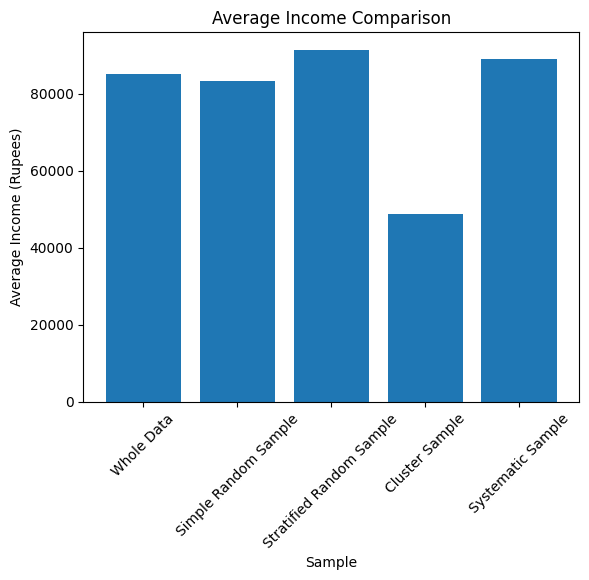

In [62]:

# Plot the mean income comparison
plt.bar(['Whole Data', 'Simple Random Sample', 'Stratified Random Sample', 'Cluster Sample', 'Systematic Sample'], 
[data['Income'].mean(), simple_mean, stratified_mean, cluster_mean, systematic_mean])

plt.title('Average Income Comparison')
plt.xlabel('Sample')
plt.ylabel('Average Income (Rupees)')
plt.xticks(rotation=45)
plt.savefig('income_comparison_bar.png')
plt.show()



C:\Users\ajitk\AppData\Local\Temp\ipykernel_5872\4161885797.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data['Income'], sample_data['Income'], stratified_sample_data['Income'], cluster_sample_data['Income'], systematic_sampling_data['Income']],


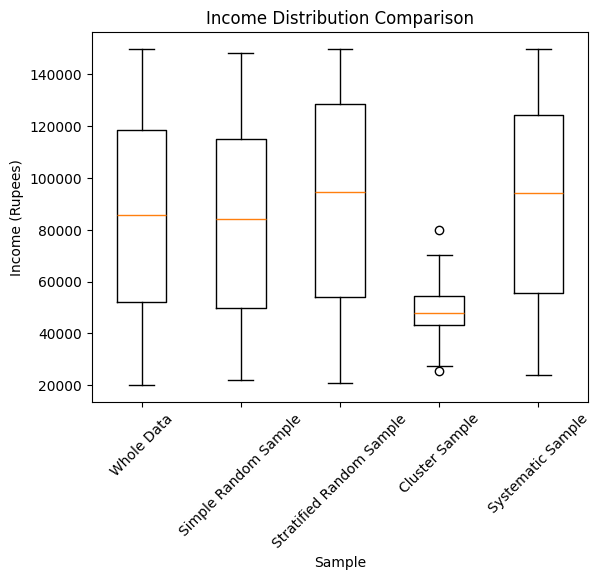

In [61]:
plt.boxplot([data['Income'], sample_data['Income'], stratified_sample_data['Income'], cluster_sample_data['Income'], systematic_sampling_data['Income']], 
labels=['Whole Data', 'Simple Random Sample', 'Stratified Random Sample', 'Cluster Sample', 'Systematic Sample'])

plt.title('Income Distribution Comparison')
plt.xlabel('Sample')
plt.ylabel('Income (Rupees)')
plt.xticks(rotation=45)
plt.savefig('income_comparison_boxplot.png')
plt.show()